## **Segmentación de Usuarios con Aprendizaje No Supervisado**

Este notebook implementa modelos de aprendizaje no supervisado (K-means, DBSCAN, PCA y t-SNE) para segmentar perfiles de usuarios en una plataforma digital. Se incluyen visualizaciones y comparaciones técnicas entre los modelos.

**Caso de Estudio:** Customer Personality Analysis

**Fuente:** www.kaggle.com
Este conjunto de datos proviene de un análisis de clientes realizado por una tienda en línea, con el objetivo de comprender el comportamiento y las características demográficas de sus clientes para personalizar estrategias de marketing.
Objetivo: Realizar una segmentación de clientes basada en sus características para identificar diferentes perfiles de clientes. Esta segmentación puede ayudar a la empresa a personalizar campañas de marketing y mejorar la fidelización de clientes.

El análisis se enfoca en la clasificación y agrupamiento de los clientes mediante técnicas de machine learning como K-Means y DBSCAN, con el fin de encontrar patrones significativos que puedan guiar las estrategias de negocio.
## Objetivos:
- Segmentar usuarios usando clustering no supervisado.
- Visualizar y comparar resultados de diferentes métodos.
- Analizar el impacto de los parámetros y extraer conclusiones útiles para marketing y personalización de servicios.


In [2]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

sns.set(style="whitegrid")


In [4]:
# Cargar el archivo
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

# Ver las primeras filas del archivo original
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [5]:
# -----------------------------------------------------------
# Preprocesamiento de Datos
# -----------------------------------------------------------

df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
# Verificación inicial de tipos de datos, para asegurarse de que las variables categóricas sean tratadas correctamente
print("Columnas categóricas:", df.select_dtypes(include=['object']).columns)

# Eliminar columnas irrelevantes (ID, fechas, costos y revenues no son útiles para la segmentación)
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Eliminar filas con datos faltantes
df.dropna(inplace=True)

# Revisar las columnas después de eliminar las faltantes
print(f"Columnas restantes después de eliminar filas con datos faltantes: {df.columns}")

# Convertir variables categóricas a variables dummies (si las hubiera)
# Esto convierte las variables categóricas a variables binarias (0, 1)
df = pd.get_dummies(df, drop_first=True)

# Revisar las primeras filas después de la conversión a dummies
print("Primeras filas después de convertir las variables categóricas:")
print(df.head())

# Escalar los datos (escalado estándar para normalizar las variables)
# Mostrará el resultado de normalizar cada variable (columna) para que tenga una media de 0 y una desviación estándar de 1.
# Esto se hace para que las características estén en la misma escala, lo que es importante para algoritmos como K-means que son sensibles a la magnitud de las variables.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Revisar las primeras filas después del escalado
print("Primeras filas después del escalado:")
print(X_scaled[:5])


Columnas categóricas: Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')
Columnas restantes después de eliminar filas con datos faltantes: Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')
Primeras filas después de convertir las variables categóricas:
   Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1957  58138.0        0         0       58       635         88   
1        1954  46344.0        1         1       38        11          1   
2        1965  71613.0        0         0       26       426         49   
3        1

<Figure size 1400x500 with 0 Axes>

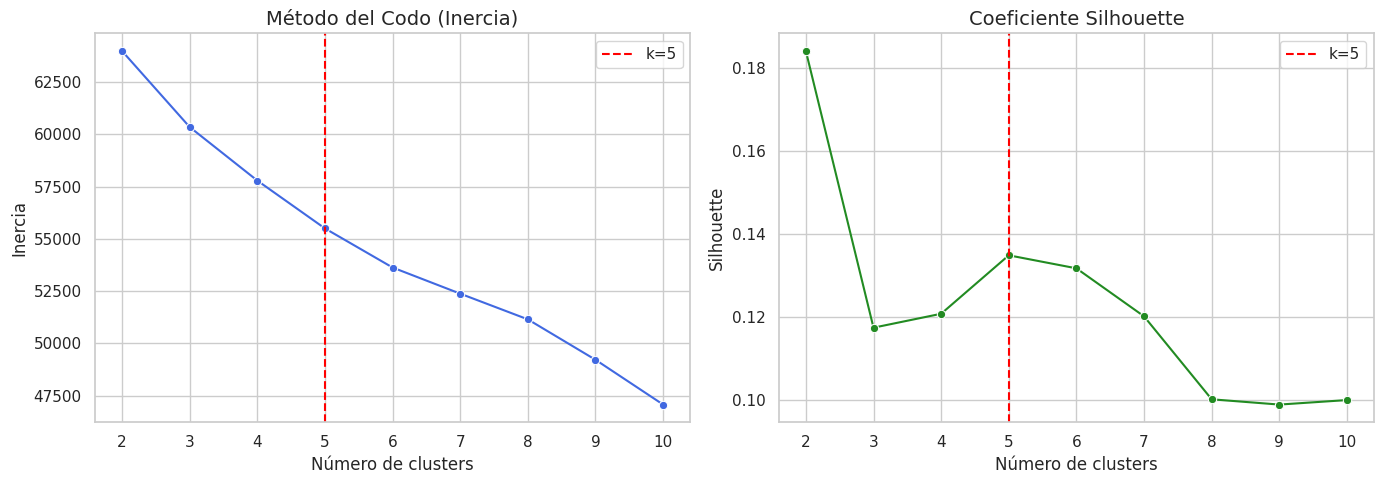

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Graficar Codo y Silhouette
plt.figure(figsize=(14, 5))
# Método del codo
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=list(K_range), y=inertia, marker='o', color='royalblue')
plt.title('Método del Codo (Inercia)', fontsize=14)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
#  línea para marcar el punto óptimo donde ambos métodos indican el número de clusters a elegir.
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k={k_optimo}')
plt.legend()

# Coeficiente Silhouette
plt.subplot(1, 2, 2)
sns.lineplot(x=list(K_range), y=silhouette, marker='o', color='forestgreen')
plt.title('Coeficiente Silhouette', fontsize=14)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette')
plt.grid(True)
# línea para marcar el punto óptimo donde ambos métodos indican el número de clusters a elegir.
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k={k_optimo}')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Elegir el valor óptimo de k (según gráficas)
k_optimo = 5
# Aplicar KMeans
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

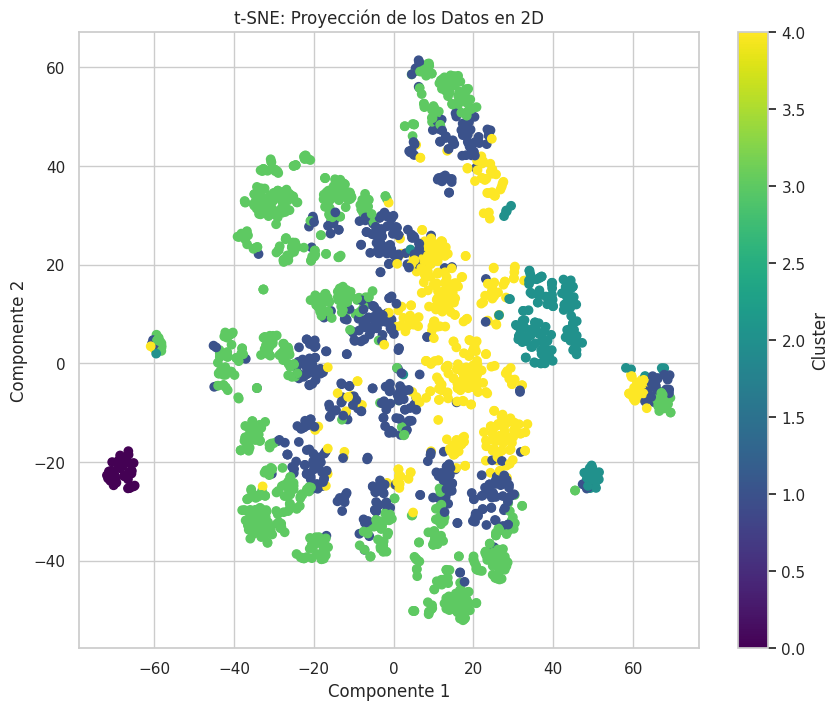

In [12]:
# TSNE (t-distributed Stochastic Neighbor Embedding)
# Permite reducir las dimensiones de las características del dataset y visualizar los agrupamientos resultantes
# Para proyectar los datos de alta dimensión a un espacio de menor dimensión (en este caso, 2 dimensiones)
from sklearn.manifold import TSNE

# Reducción de dimensiones con t-SNE a 2 componentes
tsne = TSNE(n_components=2, random_state=40)
tsne_result = tsne.fit_transform(X_scaled)

# Graficar los resultados de t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('t-SNE: Proyección de los Datos en 2D')
# Componente 1: Es la primera dimensión del espacio reducido de t-SNE. Es una representación de las características originales de los datos.
plt.xlabel('Componente 1')
# Componente 2 es la segunda dimensión después de la reducción de t-SNE.
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

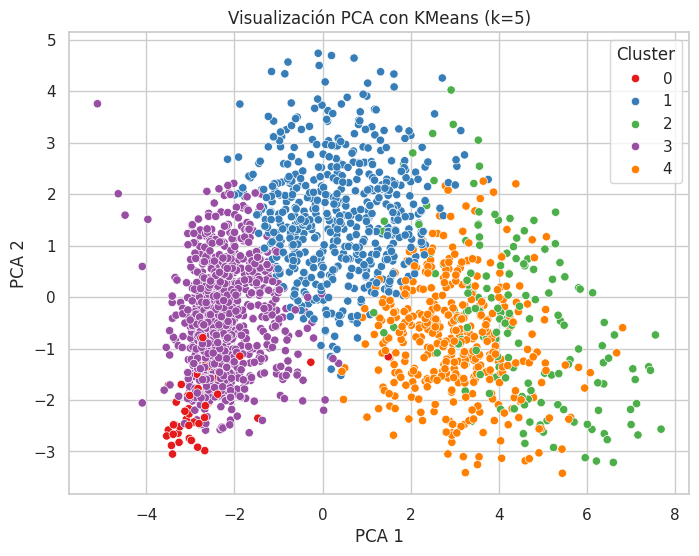

In [14]:
# PCA - (Principal Component Analysis)
from sklearn.decomposition import PCA
# Reducción de dimensiones a 2 usando PCA - para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set1')
plt.title(f'Visualización PCA con KMeans (k={k_optimo})')
# Eje X (PCA 1): Primer componente principal del análisis de PCA. Representa la dirección de mayor varianza en los datos. Es la "dimensión" en la que los datos varían más.
plt.xlabel('PCA 1')
# Eje Y (PCA 2): Segundo componente principal,  (perpendicular) al primero. Segunda mayor cantidad de varianza posible en los datos, en una dirección diferente. Segunda mejor "dimensión" para representar datos.
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

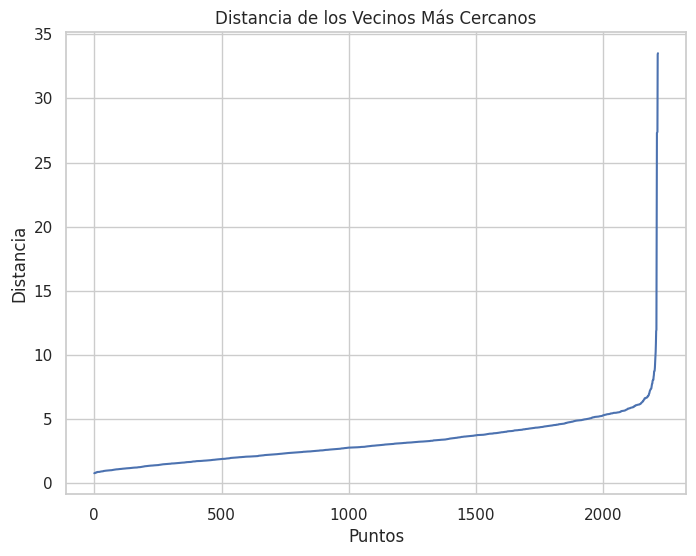

In [15]:
# Preprocesamiento adicional de DBSCAN:
# Análisis previo de la distancia de los vecinos más cercanos (NearestNeighbors) para determinar eps y min_samples de manera adecuada
# eps (la distancia máxima entre puntos vecinos) y min_samples (el número mínimo de puntos para formar un clúster).
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
# Eje X ("Puntos"): representa los puntos del dataset ordenados por la distancia de su 5º vecino más cercano.
# Eje Y ("Distancia"): muestra la distancia del 5º vecino más cercano para cada punto.
# Graficar la distancia de los vecinos más cercanos para elegir el valor óptimo de eps
plt.figure(figsize=(8, 6))
plt.plot(np.sort(distances[:, 4]))
plt.title('Distancia de los Vecinos Más Cercanos')
plt.xlabel('Puntos')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()

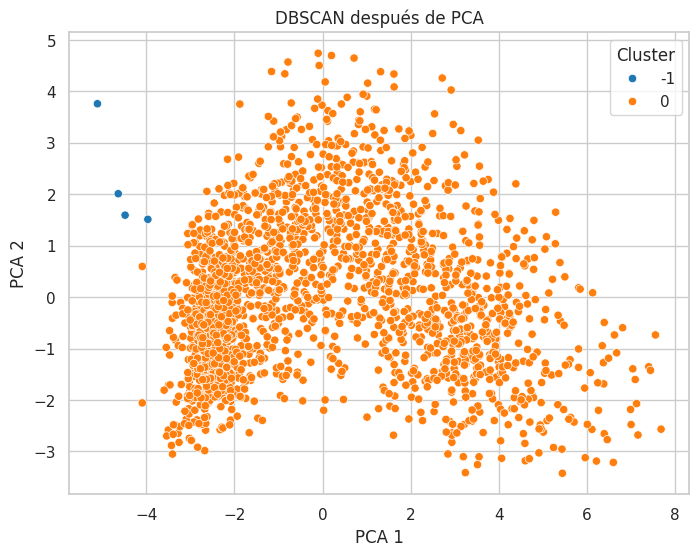

Clusters encontrados con DBSCAN:
{np.int64(-1): np.int64(4), np.int64(0): np.int64(2212)}


In [16]:
from sklearn.cluster import DBSCAN
import numpy as np

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

# Visualizar clusters de DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='tab10')
plt.title('DBSCAN después de PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Ver número de clusters encontrados
unique, counts = np.unique(labels_dbscan, return_counts=True)
print("Clusters encontrados con DBSCAN:")
print(dict(zip(unique, counts)))



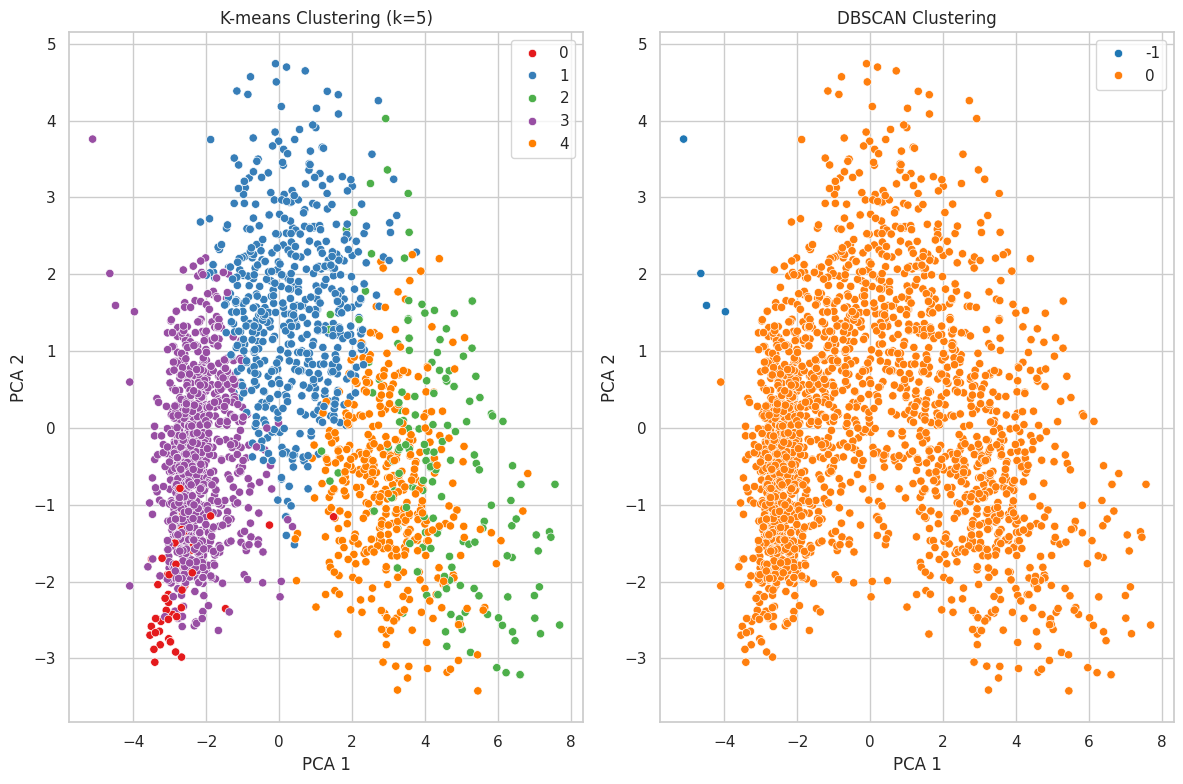

In [17]:
# Visualización comparativa
# Comparación entre K-means y DBSCAN:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set1')
plt.title(f'K-means Clustering (k={k_optimo})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='tab10')
plt.title(f'DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


In [18]:
# Resumen de Características Numéricas por Clúster (DBSCAN)
# Mostrar resumen para DBSCAN
df_clustered_dbscan = df.copy()
df_clustered_dbscan['Cluster'] = labels_dbscan
summary_table_dbscan = df_clustered_dbscan.groupby('Cluster').mean().round(2).T
print("Resumen de características por cluster (DBSCAN):")
display(summary_table_dbscan)

Resumen de características por cluster (DBSCAN):


Cluster,-1,0
Year_Birth,1960.25,1968.84
Income,4559.00,52333.49
Kidhome,0.50,0.44
Teenhome,0.75,0.50
Recency,59.50,48.99
MntWines,35.25,305.58
MntFruits,0.75,26.40
MntMeatProducts,5.50,167.29
MntFishProducts,1.25,37.70
MntSweetProducts,1.25,27.08


In [19]:
# Resumen de Características por Clúster (K-Means)
# Asignar las etiquetas de KMeans al DataFrame original
df_clustered_kmeans = df.copy()
df_clustered_kmeans['Cluster'] = kmeans.labels_  # Usamos las etiquetas generadas por KMeans

# Crear la tabla de resumen, agrupando por 'Cluster' y calculando la media para cada característica
summary_table_kmeans = df_clustered_kmeans.groupby('Cluster').mean().round(2).T

# Mostrar el resumen
print("Resumen de características por clúster (KMeans):")
display(summary_table_kmeans)


Resumen de características por clúster (KMeans):


Cluster,0,1,2,3,4
Year_Birth,1977.46,1964.22,1969.43,1971.49,1967.98
Income,20306.26,57524.67,81892.28,35286.86,74531.28
Kidhome,0.63,0.22,0.05,0.82,0.05
Teenhome,0.09,0.93,0.14,0.45,0.23
Recency,48.44,48.59,49.67,49.23,48.94
MntWines,7.24,450.97,878.21,41.84,494.89
MntFruits,11.11,20.16,55.28,4.72,72.80
MntMeatProducts,11.44,129.58,467.05,23.63,434.43
MntFishProducts,17.06,26.94,76.38,7.02,106.74
MntSweetProducts,12.11,20.42,65.02,4.79,71.79


In [20]:
# Resumen de Características Numéricas por Clúster (K-Means)
import numpy as np

# Verifica las longitudes
print(f"Longitud del DataFrame: {len(df)}")
print(f"Longitud de labels_kmeans: {len(labels_kmeans)}")

# Crea una copia del DataFrame original
df_clustered = df.copy()

# Crea una columna de clusters inicializada en NaN
df_clustered['Cluster'] = np.nan

# Identificar las filas utilizadas en K-Means
kmeans_indices = df.dropna().index[:len(labels_kmeans)]

# Asignar los labels solo a esas filas
df_clustered.loc[kmeans_indices, 'Cluster'] = labels_kmeans

# Seleccionar solo las columnas numéricas para calcular la media
numeric_columns = df_clustered.select_dtypes(include=[np.number]).columns

# Calcular media de cada variable numérica por cluster
summary_table = df_clustered.groupby('Cluster')[numeric_columns].mean().round(2)

# Transponer para mejor visualización
summary_table = summary_table.T

# Mostrar resumen
print("Resumen de características numéricas por cluster (K-Means):")
print(summary_table)

Longitud del DataFrame: 2216
Longitud de labels_kmeans: 2216
Resumen de características numéricas por cluster (K-Means):
Cluster                   0.0       1.0       2.0       3.0       4.0
Year_Birth            1977.46   1964.22   1969.43   1971.49   1967.98
Income               20306.26  57524.67  81892.28  35286.86  74531.28
Kidhome                  0.63      0.22      0.05      0.82      0.05
Teenhome                 0.09      0.93      0.14      0.45      0.23
Recency                 48.44     48.59     49.67     49.23     48.94
MntWines                 7.24    450.97    878.21     41.84    494.89
MntFruits               11.11     20.16     55.28      4.72     72.80
MntMeatProducts         11.44    129.58    467.05     23.63    434.43
MntFishProducts         17.06     26.94     76.38      7.02    106.74
MntSweetProducts        12.11     20.42     65.02      4.79     71.79
MntGoldProds            22.83     57.95     77.14     15.14     77.57
NumDealsPurchases        1.80      3.71

In [ ]:
# ANÁLISIS ESTADÍSTICO
# Resumen estadístico de las variables numéricas
#df.describe() proporciona estadísticas como la media, desviación estándar, mínimo, máximo, cuartiles (25%, 50%, 75%) para las columnas numéricas.
summary_stats = df.describe().T

# Mostrar el resumen
print("Resumen estadístico de las variables numéricas:")
display(summary_stats)


Resumen estadístico de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0


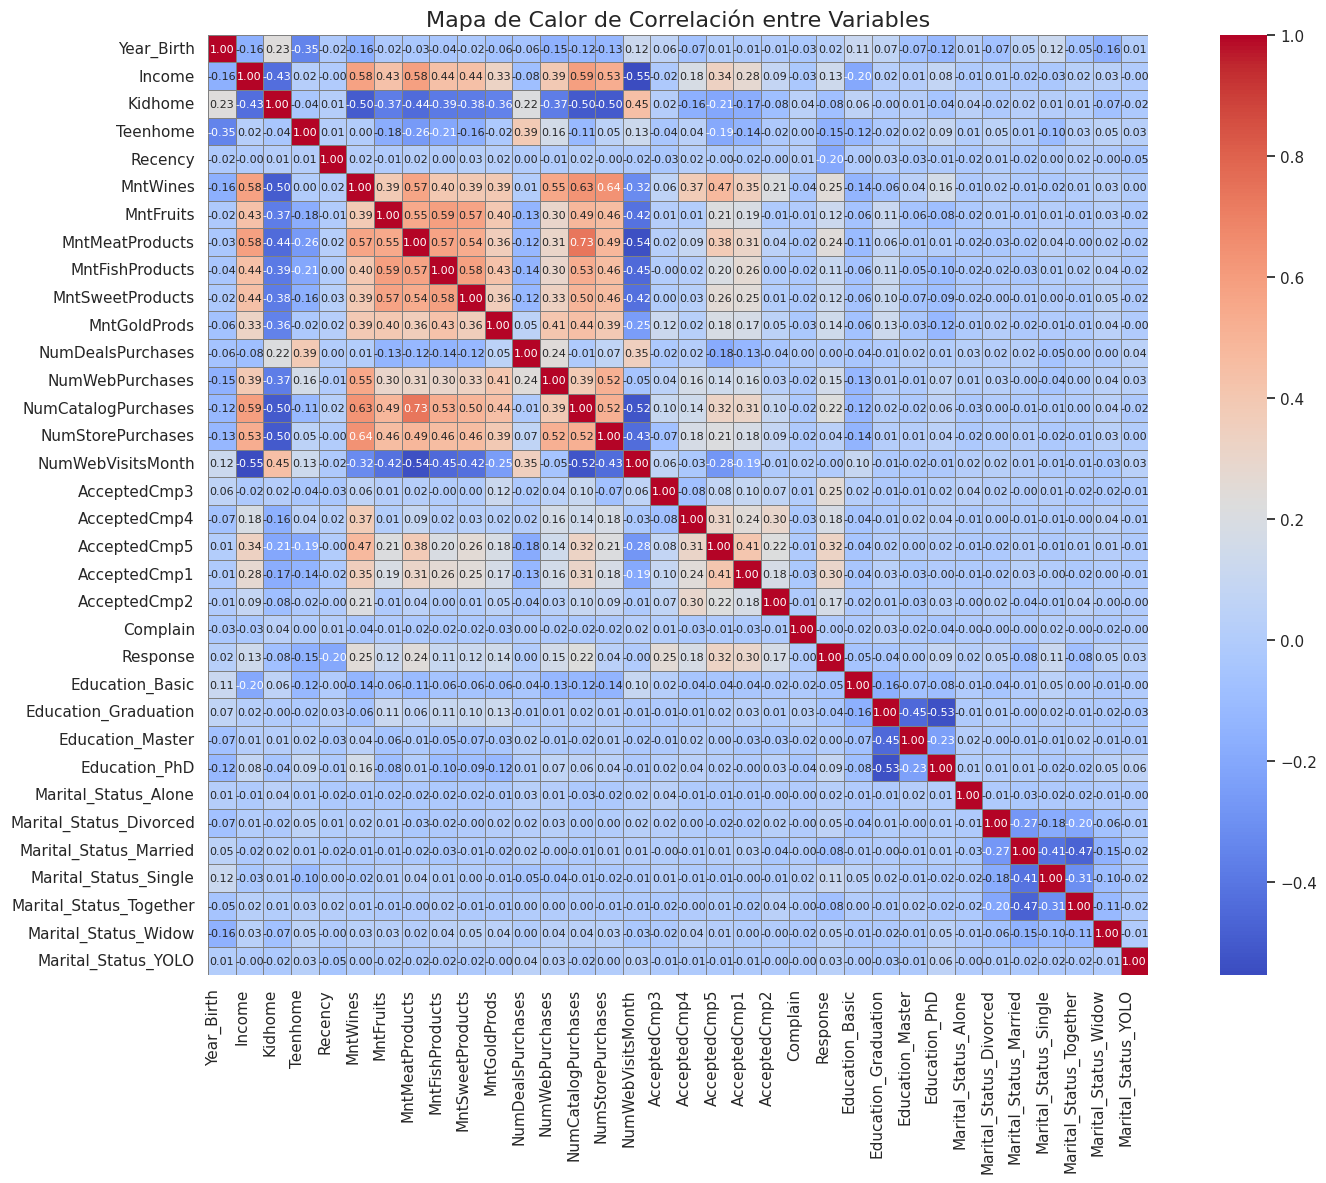

In [23]:
# Visualización de Correlaciones y Distribución
# a. Correlaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Generar el mapa de calor de la correlación
plt.figure(figsize=(16, 12))  # Ajustar el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            cbar=True, square=True, linewidths=0.5, linecolor='gray',
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8})  # Ajusta el tamaño de los números en las celdas

# Rotar las etiquetas de los ejes para mayor legibilidad
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas del eje x
plt.yticks(rotation=0)  # No rotar etiquetas del eje y

# Añadir título
plt.title('Mapa de Calor de Correlación entre Variables', fontsize=16)
plt.tight_layout()  # Ajusta el layout para que todo se vea bien

# Mostrar el gráfico
plt.show()

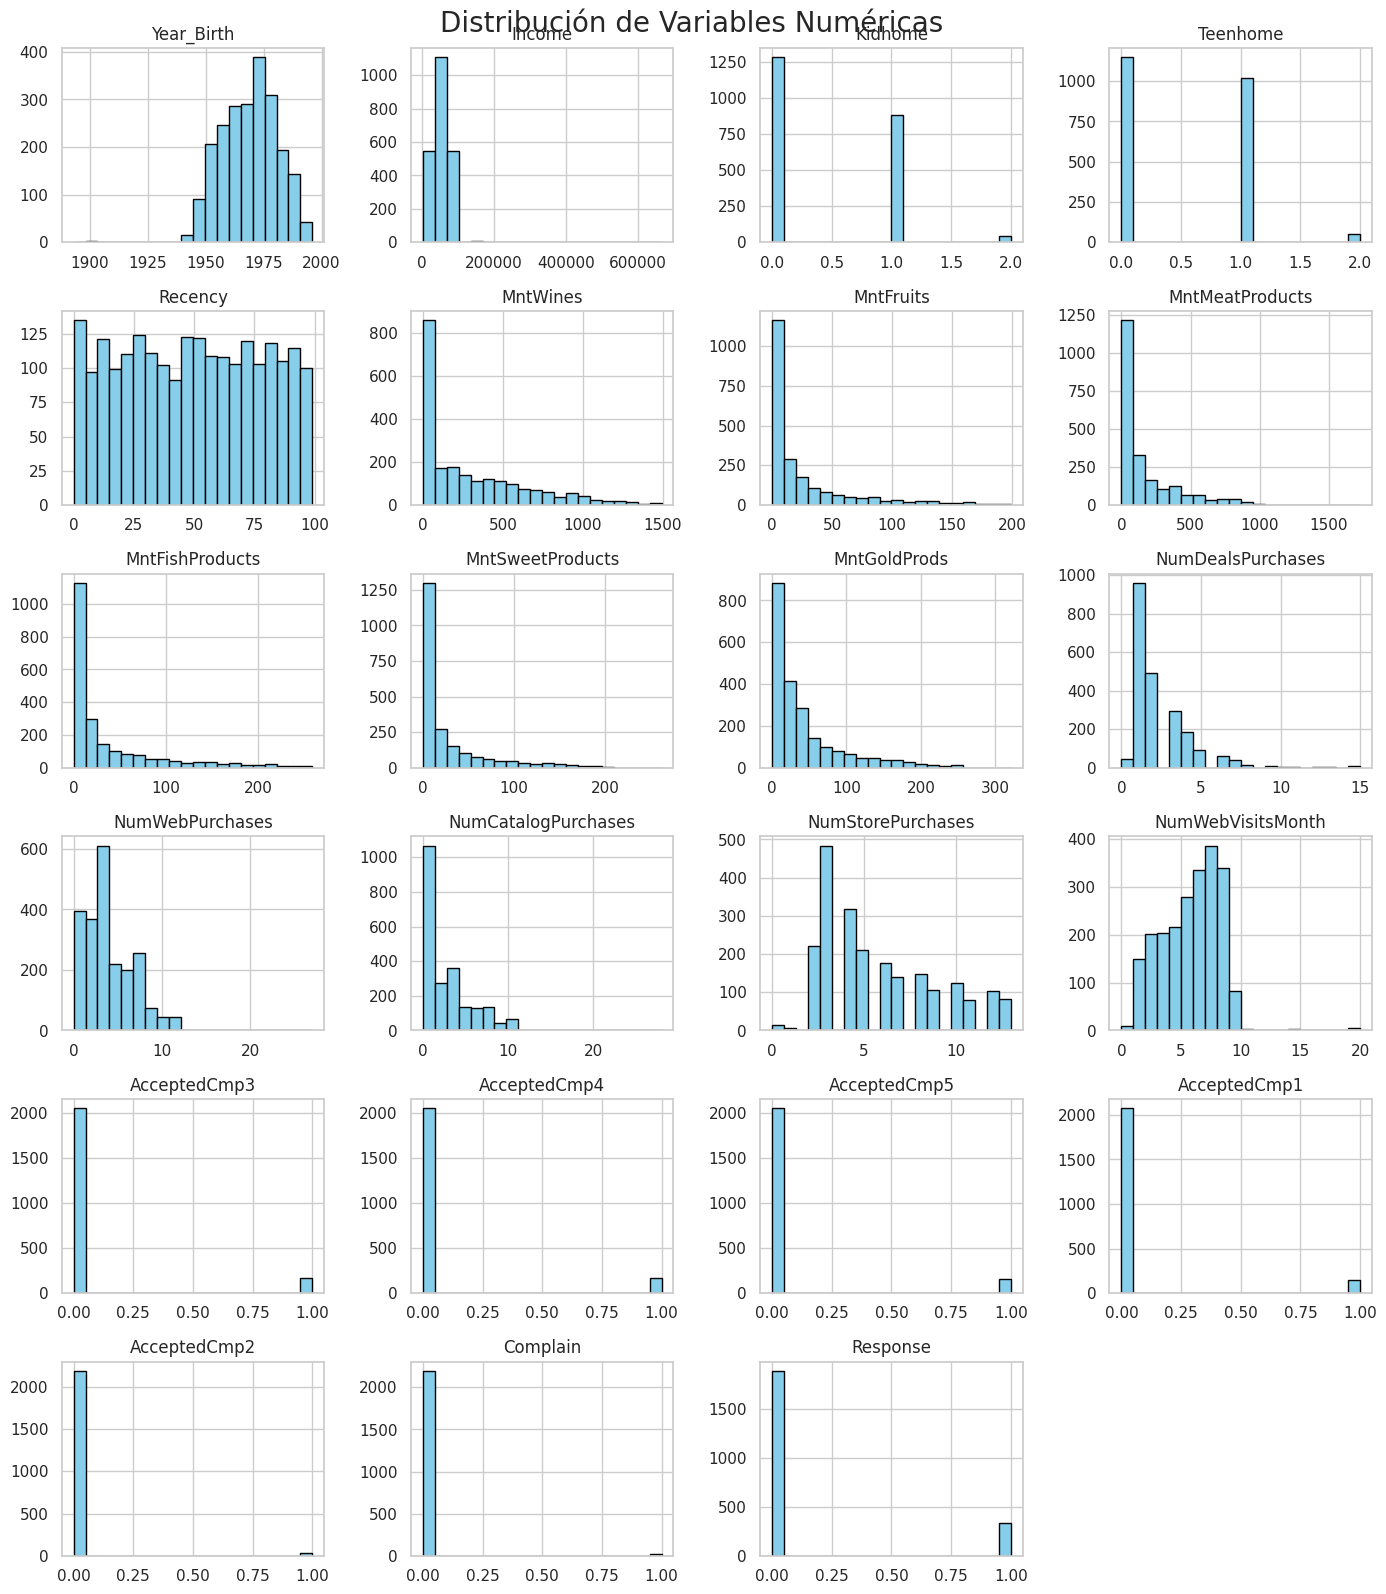

In [34]:
import matplotlib.pyplot as plt

# Crear el histograma para todas las columnas numéricas de df con más altura en Y
df.hist(bins=20, figsize=(14, 24), color='skyblue', edgecolor='black', layout=(len(df.columns) // 4 + 1, 4))

# Título general del gráfico
plt.suptitle('Distribución de Variables Numéricas', fontsize=20)

# Mejorar la visualización con la rotación de etiquetas de los ejes
plt.xticks(rotation=45, fontsize=14)  # Rotar etiquetas en el eje x y aumentar el tamaño de la fuente
plt.yticks(rotation=45, fontsize=14)  # Rotar etiquetas en el eje y y aumentar el tamaño de la fuente

# Ajustar el layout para que los elementos no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


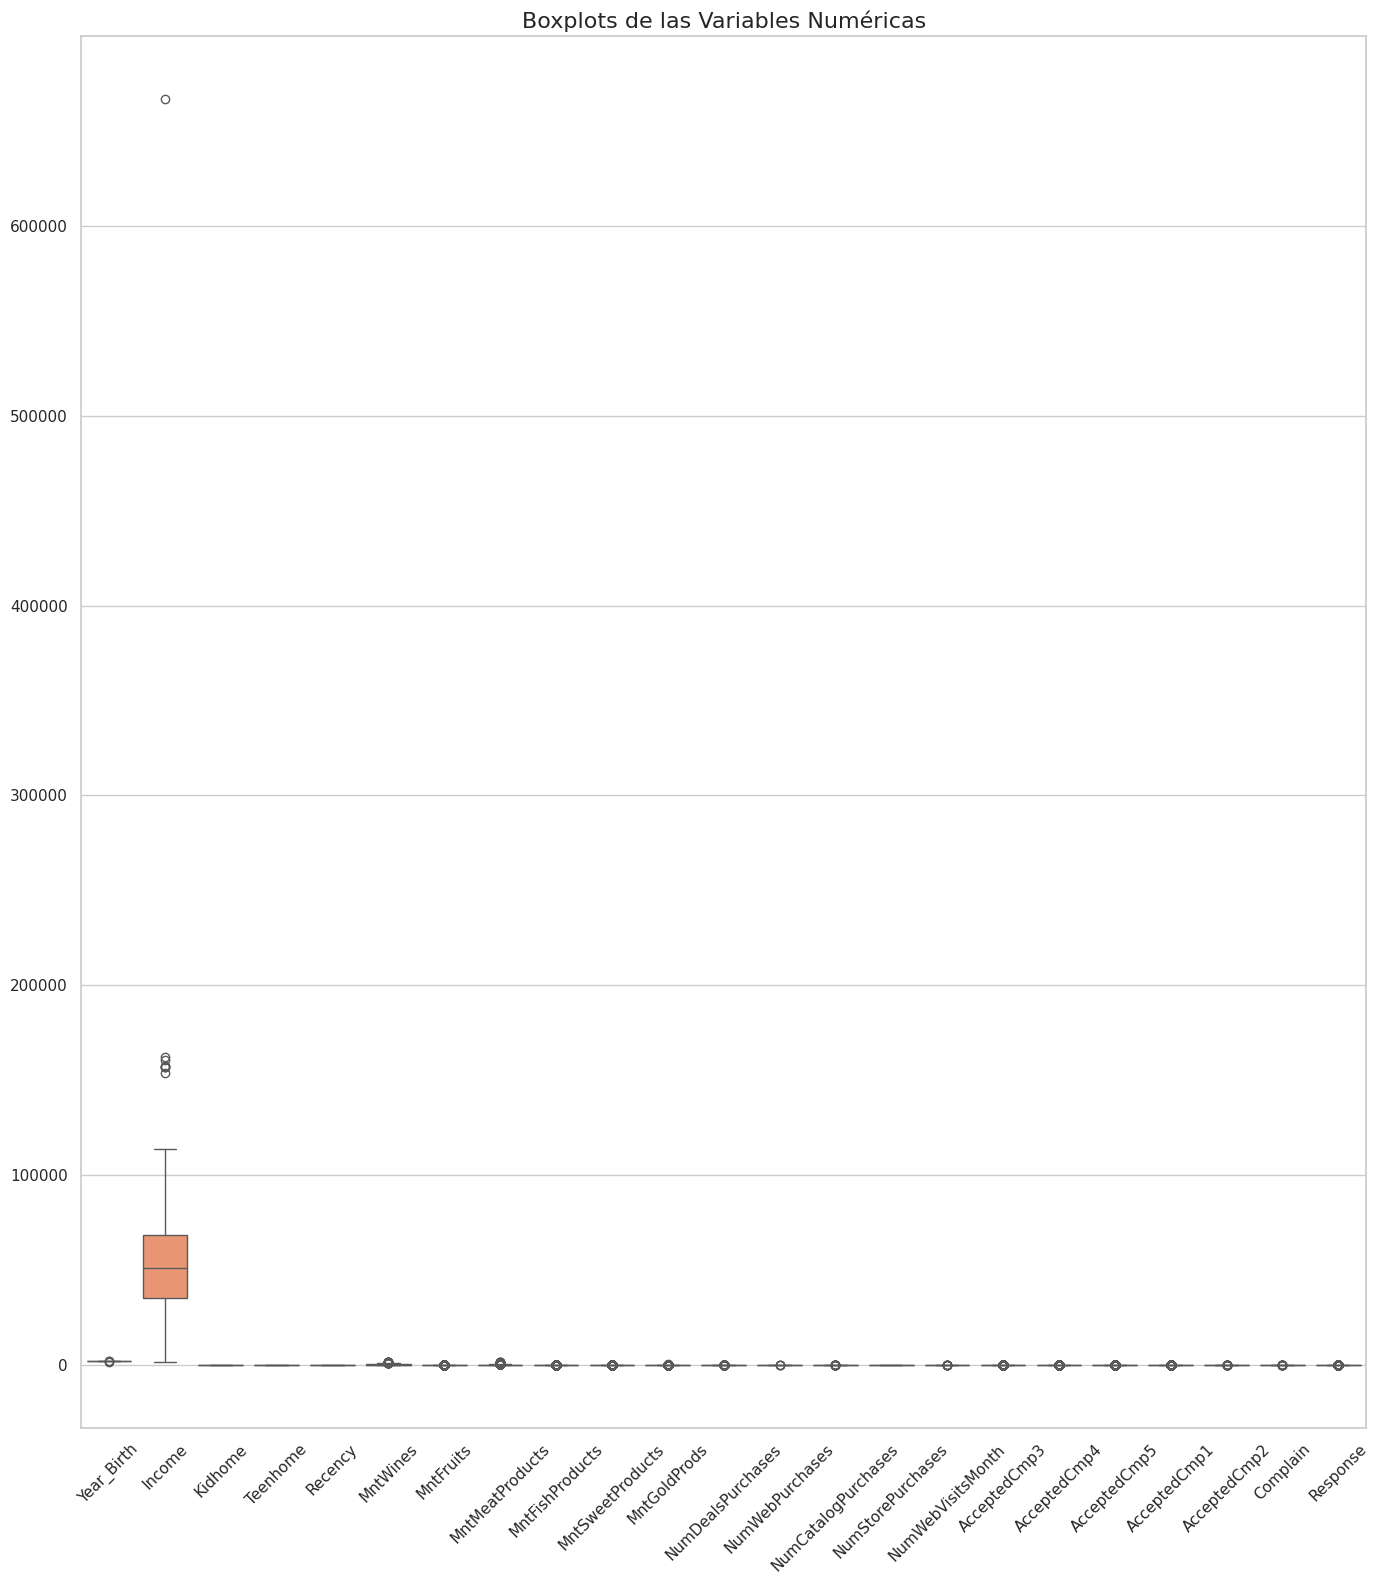

In [ ]:
# Visualización de Correlaciones y Distribución
# b.2 Boxplots para variables numéricas
# Identifican valores atípicos (outliers) y también dan una  idea sobre la dispersión y la asimetría de cada variable.
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para las variables numéricas
plt.figure(figsize=(14, 16))  # Aumenta el tamaño de la figura si es necesario
sns.boxplot(data=df.select_dtypes(include=[np.number]), palette='Set2')

# Título y etiquetas
plt.title('Boxplots de las Variables Numéricas', fontsize=16)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad

# Ajustar el layout para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
